# Model Selection


1. [Binary Classification](#1.-Binary-Classification) <br>
    1.1 [Decision Tree](#1.1-Decision-Tree)<br>
    1.2 [Logistic Regression](#1.2-logistic-regression)<br>
    1.3 [Knn](#1.3-knn)<br>
    1.4 [Naive Bayes](#1.4-naive-bayes)<br>
    1.5 [Neural Networks](#1.5-neural-networks)<br>
    1.6 [SVM](#1.6-svm)<br>
    1.7 [Ensembles](#1.7-ensembles)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.1 [Random Forest](#1.7.1-random-forest)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.2 [Bagging Decision Tree](#1.7.2-bagging-decision-tree)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.3 [Bagging Logistic Regression](#1.7.3-bagging-logistic-regression)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.4 [Bagging Naive Bayes](#1.7.4-bagging-naive-bayes)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.5 [Adaboost Decision Tree](#1.7.5-adaboost-decision-tree)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.6 [Adaboost Logistic Regression](#1.7.6-adaboost-logistic-regression)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.7 [Adaboost Naive Bayes](#1.7.7-adaboost-naive-bayes)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.8 [Gradient Boosting](#1.7.8-gradient-boosting)<br>
    1.8 [Model Selection binary problem](#1.8-model-selection-binary-problem)<br>
    1.9 [Final model](#1.9-final-model-(Binary))<br>
2. [Multiclass Classification](#2.-Multiclass-Classification) <br>
    2.1 [Decision Tree](#2.1-Decision-Tree-M)<br>
    2.2 [Logistic Regression](#2.2-logistic-regression-M)<br>
    2.3 [Knn](#2.3-knn-M)<br>
    2.4 [Naive Bayes](#2.4-naive-bayes-M)<br>
    2.5 [Neural Networks](#2.5-neural-networks-M)<br>
    2.6 [SVM](#2.6-svm-M)<br>
    2.7 [Ensembles](#2.7-ensembles-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.1 [Random Forest](#2.7.1-random-forest-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.2 [Bagging Decision Tree](#2.7.2-bagging-decision-tree-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.3 [Bagging Logistic Regression](#2.7.3-bagging-logistic-regression-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.4 [Bagging Naive Bayes](#2.7.4-bagging-naive-bayes-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.5 [Adaboost Decision Tree](#2.7.5-adaboost-decision-tree-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.6 [Adaboost Logistic Regression](#2.7.6-adaboost-logistic-regression-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.7 [Adaboost Naive Bayes](#2.7.7-adaboost-naive-bayes-M)<br>
        &nbsp;&nbsp;&nbsp;&nbsp;1.7.8 [Gradient Boosting](#2.7.8-gradient-boosting-M)<br>
    2.8 [Model Selection multiclass problem](#2.8-model-selection-multiclass-problem)<br>
    2.9 [Final model](#2.9-final-model-(Multiclass))<br>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score


In [2]:
train = pd.read_csv('train_cleaned.csv').set_index('encounter_id')
target_binary = pd.read_csv('target_binary.csv').set_index('encounter_id')
test_cleaned = pd.read_csv('test_cleaned.csv').set_index('encounter_id')
target_multiclass = pd.read_csv('target_multiclass.csv').set_index('encounter_id')

### Some funtions:

In [31]:
def get_best_params (model, param_grid, X, y):
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='f1', cv=StratifiedKFold(5), random_state=42, n_jobs=-1)
    random_search.fit(X, y)

    print("Best hyperparameters:")
    print(random_search.best_params_)
    print("Best F1 score:")
    print(random_search.best_score_)
    return random_search.best_score_

In [19]:
def get_best_params_multiclass(model, param_grid, X, y):
    random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='f1_weighted', cv=StratifiedKFold(5), random_state=42, n_jobs=-1)
    random_search.fit(X, y)

    print("Best hyperparameters:")
    print(random_search.best_params_)
    print("Best weighted F1 score:")
    print(random_search.best_score_)
    return random_search.best_score_


In [16]:
def transf_multiclass(target):
    if target == 'No':
        return 0
    elif target == '<30 days':
        return 1
    else:
        return 2
target_multiclass = target_multiclass['readmitted_multiclass'].apply(transf_multiclass)

# 1. Binary Classification 

### 1.1 Decision tree

In [39]:
# dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42,)

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 7, 10, 20, 30],
#     'min_samples_split': [5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 5, 10, 20, 30],
#     'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
# }

# dtc_score = get_best_params(dtc, param_grid, train, target_binary)

Best hyperparameters:
{'min_samples_split': 20, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Best F1 score:
0.32104707091772433


In [40]:
dtc = DecisionTreeClassifier(class_weight='balanced', random_state=42, min_samples_split=20, min_samples_leaf=2, max_leaf_nodes=20, max_features='sqrt', max_depth=10, criterion='entropy', min_impurity_decrease=0.0)

### 1.2 Logistic regression

In [17]:
# logr = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# lr_score = get_best_params(logr, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'solver': 'saga', 'penalty': 'l1', 'C': 0.01}
Best F1 score:
0.32427031052708377


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [18]:
logr = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1, solver='saga', penalty='l1', C=0.01)

### 1.3 KNN

In [19]:
# knn = KNeighborsClassifier(n_jobs=-1)
# param_grid = {
#     'metric': ['euclidean', 'manhattan'],
#     'n_neighbors': [3, 5, 10, 20],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'kd_tree', 'brute'],
#     'leaf_size': [10, 20, 30, 40, 50]   #aumentar
# }

# knn_score = get_best_params(knn, param_grid, train, target_binary)

Best hyperparameters:
{'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 50, 'algorithm': 'brute'}
Best F1 score:
0.15758345575632274


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
knn = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=3, metric='manhattan', leaf_size=50, algorithm='brute')

### 1.4 Naive bayes

In [32]:
# bernoulli = BernoulliNB()

# param_grid = {
#     'alpha': [0.0, 0.1, 0.5, 1.0],
#     'fit_prior': [True, False]
# }

# bernoulli_score = get_best_params(bernoulli, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters:
{'fit_prior': False, 'alpha': 1.0}
Best F1 score:
0.3003553337984086


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
bernoulli = BernoulliNB(alpha=1.0, fit_prior=False)

### 1.5 Neural networks

In [24]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# nn = MLPClassifier(random_state=42)

# scores = cross_val_score(nn, train, target_binary, cv=cv, scoring='f1')

# print('Mean f1:', np.mean(scores))

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column

Mean f1: 0.1667394608724285


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [76]:
nn_score = 0.1667394608724285

### 1.6 SVM

In [26]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# svm = SVC(class_weight='balanced', random_state=42)

# scores = cross_val_score(svm, train, target_binary, cv=5, scoring='f1')

# print('Mean f1:', np.mean(scores))

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataC

Mean f1: 0.32726325489529373


In [77]:
svm_score = 0.32726325489529373

## 1.7 Ensembles

### 1.7.1 Random Forest

In [14]:
# rf_classifier = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'max_features': ['sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }

# rf_score = get_best_params(rf_classifier, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best hyperparameters:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini', 'bootstrap': True}
Best F1 score:
0.3304634692524382


In [9]:
rf_classifier = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=10, bootstrap=True, max_features='sqrt', criterion='gini')

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
# rf_classifier = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_depth=10, bootstrap=True)
# rf_classifier.fit(train, target_binary)

# preds = rf_classifier.predict(test_cleaned)
# preds = np.where(preds == 1, 'Yes', 'No')
# submission = pd.DataFrame({'encounter_id': test_cleaned.index, 'readmitted_binary': preds}).to_csv('submissions/submission_model_new_5.csv', index=False)

### 1.7.2 Bagging DT

In [41]:
# bagging_dt = BaggingClassifier(estimator = dtc)


# param_grid = {
#     'n_estimators':[10,50,100,200], 
#     'max_samples': [0.2, 0.5, 0.7, 0.8, 1.0],
#     'max_features': [0.2, 0.5, 0.7, 0.8, 1.0],  
#     'bootstrap': [True, False]
# }

# dt_bagging_score = get_best_params(bagging_dt, param_grid, train, target_binary)


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'n_estimators': 200, 'max_samples': 0.8, 'max_features': 1.0, 'bootstrap': True}
Best F1 score:
0.3213542231619495


Since the best number os max_features is not <1.0 (in bagging we are using all features in a subset), we are not repeating random forest so, we can say that using decision tree with bagging improves the score.

### 1.7.3 Bagging Logistic Regression

In [32]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# bagging_logreg = BaggingClassifier(estimator = logr, n_jobs = -1)

# scores_lr_bagging = cross_val_score(bagging_logreg, train, target_binary, cv=5, scoring='f1')

# print('Mean f1:', np.mean(scores_lr_bagging))

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataC

Mean f1: 0.3254447768300698


In [85]:
# lr_bagging_score = np.mean(scores_lr_bagging)

### 1.7.4 Bagging Naive Bayes

In [44]:
# bagging_nb= BaggingClassifier(estimator = bernoulli)


# param_grid = {
#     'n_estimators':[10,50,100,200], 
#     'max_samples': [0.2, 0.5, 0.7, 0.8, 1.0],
#     'max_features': [0.2, 0.5, 0.7, 0.8, 1.0],  
#     'bootstrap': [True, False]
# }


# nb_bagging_score = get_best_params(bagging_nb, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'n_estimators': 50, 'max_samples': 0.7, 'max_features': 0.8, 'bootstrap': True}
Best F1 score:
0.3005011511251544


### 1.7.5 Adaboost Decision Tree

In [71]:
# adaboost_dtc = AdaBoostClassifier(estimator = dtc, random_state=42)


# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# dtc_adaboost_score = get_best_params(adaboost_dtc, param_grid, train, target_binary)



c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'n_estimators': 10, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Best F1 score:
0.32414404194146595


In [35]:
# dtc_adaboost = AdaBoostClassifier(estimator = dtc, random_state=42, n_estimators=10, learning_rate=0.5, algorithm='SAMME.R')


### 1.7.6 Adaboost Logistic Regression

In [37]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# adaboost_logreg = AdaBoostClassifier(base_estimator=logr, random_state=42)

# scores_lr_adaboost = cross_val_score(adaboost_logreg, train, target_binary, cv=5, scoring='f1')

# print(np.mean(scores_lr_adaboost))

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and wil

0.1606466279363476


In [87]:
# adaboost_lr_score = np.mean(scores_lr_adaboost)

### 1.7.7 Adaboost Naive Bayes

In [38]:
# adaboost_nb = AdaBoostClassifier(estimator = bernoulli)


# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# nb_adaboost_score = get_best_params(adaboost_nb, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Best F1 score:
0.2531561350497905


### 1.7.8 Gradient Boosting

In [39]:
# gbm = GradientBoostingClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'subsample': [0.2, 0.5, 0.7, 0.8, 1.0],
#     'max_depth': [3, 5, 10, 20, 30],
#     'max_features': ['sqrt', 'log2', None]
# }

# gbm_score = get_best_params(gbm, param_grid, train, target_binary)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:
{'subsample': 0.8, 'n_estimators': 10, 'max_features': None, 'max_depth': 20, 'learning_rate': 1.0}
Best F1 score:
0.2067469323323404


In [40]:
# gbm = GradientBoostingClassifier(random_state=42, subsample=0.8, n_estimators = 10, max_features=None, max_depth=20, learning_rate=1.0)


### 1.8 Model Selection Binary Problem

In [92]:
# dtc_scores = [dtc_score, dt_bagging_score, dtc_adaboost_score]
# naive_bayes_scores = [bernoulli_score, nb_bagging_score, nb_adaboost_score]
# logistic_regression_scores = [lr_score, lr_bagging_score, adaboost_lr_score]

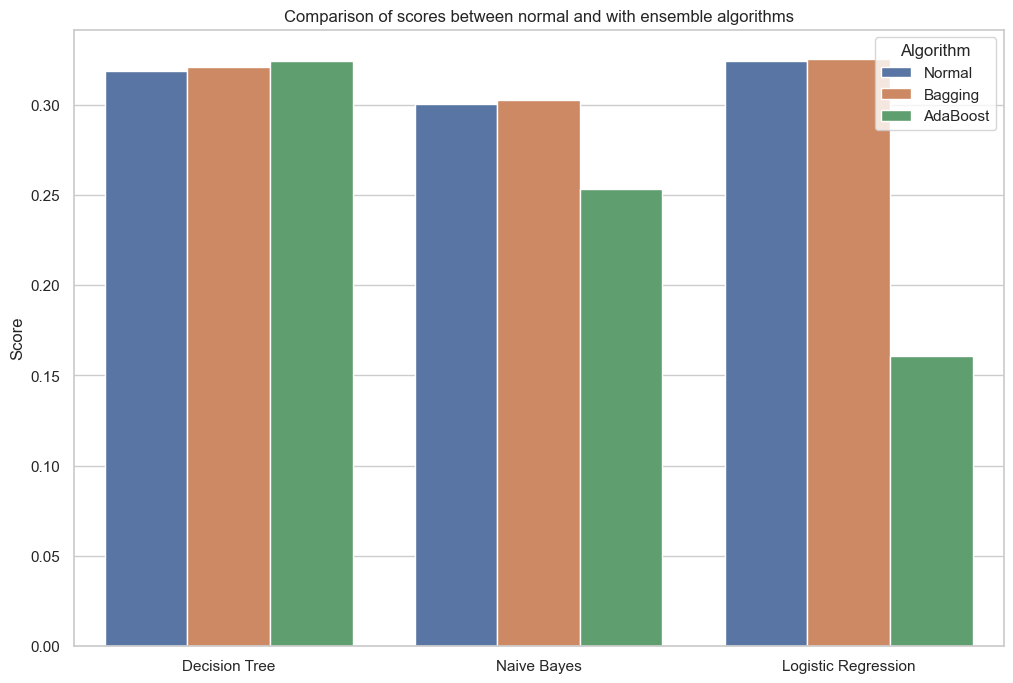

In [93]:
# data = {
#     'Algorithm': ['Decision Tree'] * 3 + ['Naive Bayes'] * 3 + ['Logistic Regression'] * 3,
#     'Score': dtc_scores + naive_bayes_scores + logistic_regression_scores,
#     'Type': ['Normal', 'Bagging', 'AdaBoost'] * 3
# }

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12, 8)) 
# g = sns.barplot(x='Algorithm', y='Score', hue='Type', data=pd.DataFrame(data))
# g.set_xlabel("")
# g.set_ylabel("Score")
# plt.title('Comparison of scores between normal and with ensemble algorithms')
# plt.legend(title='Algorithm')
# plt.show()

Best ones: <br> Decision Tree with Adaboost <br> Naive Bayes with Bagging <br> Logistic Regression with Bagging

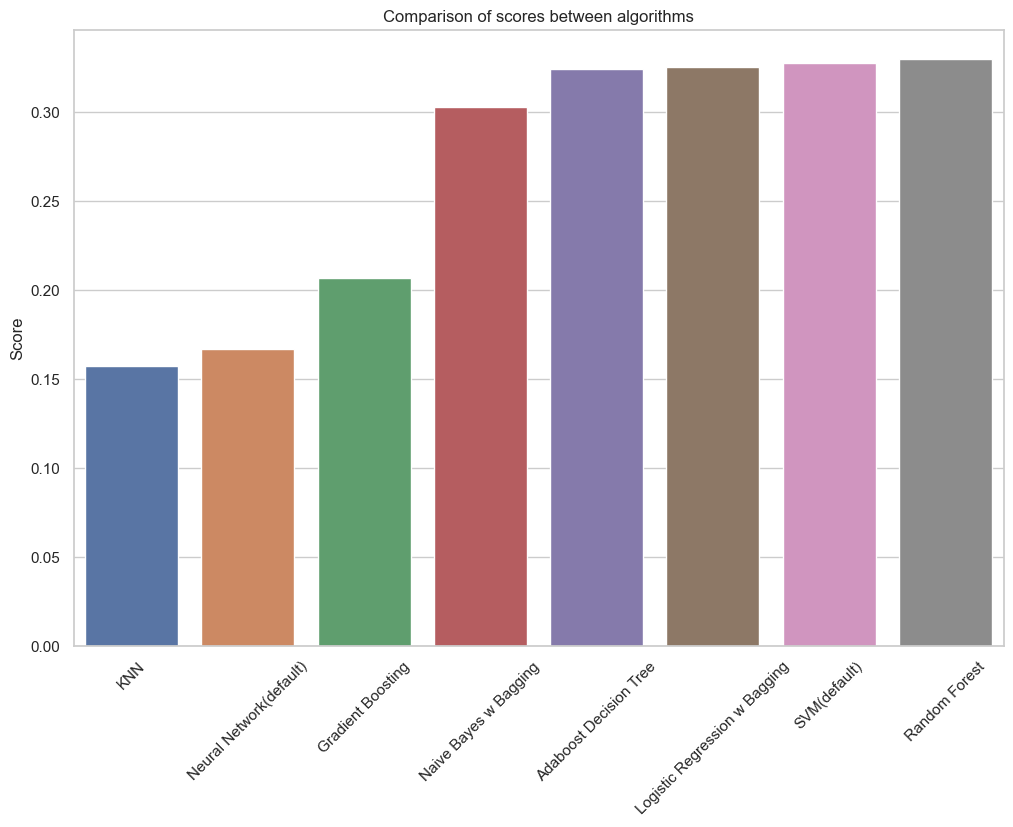

In [95]:
# data = {
#     'Algorithm': ['Adaboost Decision Tree', 'Bagging w Naive Bayes', 'Bagging w Logistic Regression', 'KNN', 'Random Forest', 'Gradient Boosting', 'Neural Network(default)', 'SVM(default)'],
#     'Score': [dtc_adaboost_score, nb_bagging_score, lr_bagging_score, knn_score, rf_score, gbm_score, nn_score, svm_score],
# }

# df = pd.DataFrame(data)
# df = df.sort_values(by='Score')

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12, 8)) 
# g = sns.barplot(x='Algorithm', y='Score', data=df)
# g.set_xlabel("")
# plt.xticks(rotation=45)
# g.set_ylabel("Score")
# plt.title('Comparison of scores between algorithms')
# plt.show()

### 1.9 Final Model (Binary):

In [10]:
rf_final = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42, n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_depth=10, bootstrap=True)

In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_final, train, target_binary, cv=cv)
conf_matrix = confusion_matrix(target_binary, y_pred)
precision = precision_score(target_binary, y_pred)
recall = recall_score(target_binary, y_pred)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

In [12]:
precision

0.21388805296418897

In [13]:
recall

0.7152201257861636

In [18]:
conf_matrix

array([[42383, 20898],
       [ 2264,  5686]], dtype=int64)

# 2. Multiclass Classification

### 2.1 Decision Tree M

In [20]:
# dtc_m = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 7, 10, 20, 30],
#     'min_samples_split': [2, 5, 10, 15],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'max_leaf_nodes': [None, 5, 10, 20, 30],
#     'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
# }

# dt_score_multiclass = get_best_params_multiclass(dtc_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'min_samples_split': 15, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
Best weighted F1 score:
0.5344795671430699


In [21]:
dtc_m = DecisionTreeClassifier(class_weight='balanced', random_state=42, min_samples_split=15, min_samples_leaf=2, max_leaf_nodes=20, max_features='sqrt', max_depth=10, criterion='entropy')

### 2.2 Logistic Regression M

In [47]:
# logr_m = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1)
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# lr_score_multiclass = get_best_params_multiclass(logr_m, param_grid, train, target_multiclass)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1223: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


Best hyperparameters:
{'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Best weighted F1 score:
0.6247117036439249


In [48]:
logr_m = LogisticRegression(class_weight='balanced', random_state=42, n_jobs=-1, solver='liblinear', penalty='l1', C=100)

### 2.3 KNN M

In [49]:
# knn_m = KNeighborsClassifier(n_jobs=-1)

# param_grid = {
#     'metric': ['euclidean', 'manhattan'],
#     'n_neighbors': [3, 5, 10, 20],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'kd_tree', 'brute'],
#     'leaf_size': [10, 20, 30, 40, 50]
# }


# knn_score_multiclass = get_best_params_multiclass(knn_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'weights': 'distance', 'n_neighbors': 20, 'metric': 'manhattan', 'leaf_size': 40, 'algorithm': 'kd_tree'}
Best weighted F1 score:
0.5962341046621071


In [50]:
knn_m = KNeighborsClassifier(n_jobs=-1, weights='uniform', n_neighbors=20, metric='euclidean', leaf_size=10, algorithm='kd_tree')

### 2.4 Naive Bayes M

In [51]:
# bernoulli_mult = BernoulliNB()

# param_grid = {
#     'alpha': [0.01, 0.1, 1.0]
# }
# bern_score_multiclass = get_best_params_multiclass(bernoulli_mult, param_grid, train, target_multiclass)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best hyperparameters:
{'alpha': 1.0}
Best weighted F1 score:
0.6127559251619498


In [ ]:
bernoulli_mult = BernoulliNB(alpha=1.0)

alpha = 1.0 (Default)

### 2.5 Neural Networks M

In [53]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# nn = MLPClassifier(random_state=42)

# scores = cross_val_score(nn, train, target_multiclass, cv=cv, scoring='f1_weighted')

# print('Mean f1:', np.mean(scores))

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean f1: 0.640740348142153


c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [97]:
score_nn_m = 0.640740348142153

### 2.6 SVM M

In [55]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# svm = SVC(class_weight='balanced', random_state=42)

# scores_m = cross_val_score(svm, train, target_multiclass, cv=5, scoring='f1_weighted')

# print('Mean f1:', np.mean(scores_m))

Mean f1: 0.6203308185419651


In [96]:
svm_score_m = 0.6203308185419651

## 2.7 Ensembles M

### 2.7.1 Random Forest M

In [56]:
# rf_classifier_m = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
# param_grid = {
#     'n_estimators': [50, 100, 150, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False],
#     'max_features': ['sqrt', 'log2'],
#     'criterion': ['gini', 'entropy']
# }

# rf_score_multiclass = get_best_params_multiclass(rf_classifier_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': False}
Best weighted F1 score:
0.6541470957902802


### 2.7.2 Bagging Decision Tree M

In [28]:

# bagging_dt_m = BaggingClassifier(estimator = dtc_m)


# param_grid = {
#     'n_estimators':[10,50,100,200], 
#     'max_samples': [0.2, 0.5, 0.7, 0.8, 1.0]
# }

# dt_bagging_score_multiclass = get_best_params_multiclass(bagging_dt_m, param_grid, train, target_multiclass)


Best hyperparameters:
{'n_estimators': 50, 'max_samples': 0.2}
Best weighted F1 score:
0.5726980745721904


### 2.7.3 Bagging Logistic Regression M

In [59]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# bagging_logreg_m = BaggingClassifier(estimator = logr_m, n_jobs = -1)

# scores_m_lr_bagging = cross_val_score(bagging_logreg_m, train, target_multiclass, cv=5, scoring='f1_weighted')

# print('Mean f1:', np.mean(scores_m_lr_bagging))

Mean f1: 0.6254335801318577


In [100]:
# scores_log_reg_bagging_m = np.mean(scores_m_lr_bagging)

### 2.7.4 Bagging Naive Bayes M

In [60]:
# bagging_nb_m = BaggingClassifier(estimator = bernoulli_mult, n_jobs=-1)


# param_grid = {
#     'n_estimators':[100,200, 300, 500],
#     'max_samples': [0.2, 0.5, 0.7, 0.8, 1.0],
#     'max_features': [0.1, 0.2, 0.5, 1.0],
#     'bootstrap': [True, False]
# }

# nb_bagging_score_multiclass = get_best_params_multiclass(bagging_nb_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'n_estimators': 200, 'max_samples': 0.2, 'max_features': 1.0, 'bootstrap': False}
Best weighted F1 score:
0.6123077919819686


### 2.7.5 Adaboost Decision Tree M

In [61]:
# adaboost_dtc_m = AdaBoostClassifier(estimator = dtc_m, random_state=42)


# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# dtc_adaboost_score_multiclass = get_best_params_multiclass(adaboost_dtc_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Best weighted F1 score:
0.6073284832821566


### 2.7.6 Adaboost Logistic Regression M

In [63]:
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# adaboost_logreg_m = BaggingClassifier(estimator = logr_m, n_jobs = -1)

# scores_lr_adaboost_m = cross_val_score(adaboost_logreg_m, train, target_multiclass, cv=5, scoring='f1_weighted')

# print('Mean f1:', np.mean(scores_lr_adaboost_m))

Mean f1: 0.6245924595044052


In [102]:
# scores_log_reg_m_adaboost = np.mean(scores_lr_adaboost_m)

### 2.7.7 Adaboost Naive Bayes M

In [64]:
# adaboost_nb_m = AdaBoostClassifier(estimator = bernoulli_mult, random_state=42)


# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'algorithm': ['SAMME', 'SAMME.R']
# }

# nb_adaboost_score_multiclass = get_best_params_multiclass(adaboost_nb_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'n_estimators': 50, 'learning_rate': 0.5, 'algorithm': 'SAMME.R'}
Best weighted F1 score:
0.6237929651447494


### 2.7.8 Gradient Boosting M

In [65]:
# gbm_m = GradientBoostingClassifier(random_state=42)

# param_grid = {
#     'n_estimators': [10, 50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5, 1.0],
#     'subsample': [0.2, 0.5, 0.7, 0.8, 1.0],
#     'max_depth': [3, 5, 10, 20, 30],
#     'max_features': ['sqrt', 'log2', None]
# }

# gbm_score_multiclass = get_best_params_multiclass(gbm_m, param_grid, train, target_multiclass)

Best hyperparameters:
{'subsample': 0.5, 'n_estimators': 50, 'max_features': None, 'max_depth': 10, 'learning_rate': 0.1}
Best weighted F1 score:
0.6504918003382235


### 2.8 Model Selection Multiclass Problem


In [23]:
# dtc_scores_m = [dt_score_multiclass, dt_bagging_score_multiclass, dtc_adaboost_score_multiclass]
# naive_bayes_scores_m = [bern_score_multiclass, nb_adaboost_score_multiclass, nb_bagging_score_multiclass]
# logistic_regression_scores_m = [lr_score_multiclass, scores_log_reg_bagging_m, scores_log_reg_m_adaboost]

NameError: name 'dtc_adaboost_score_multiclass' is not defined

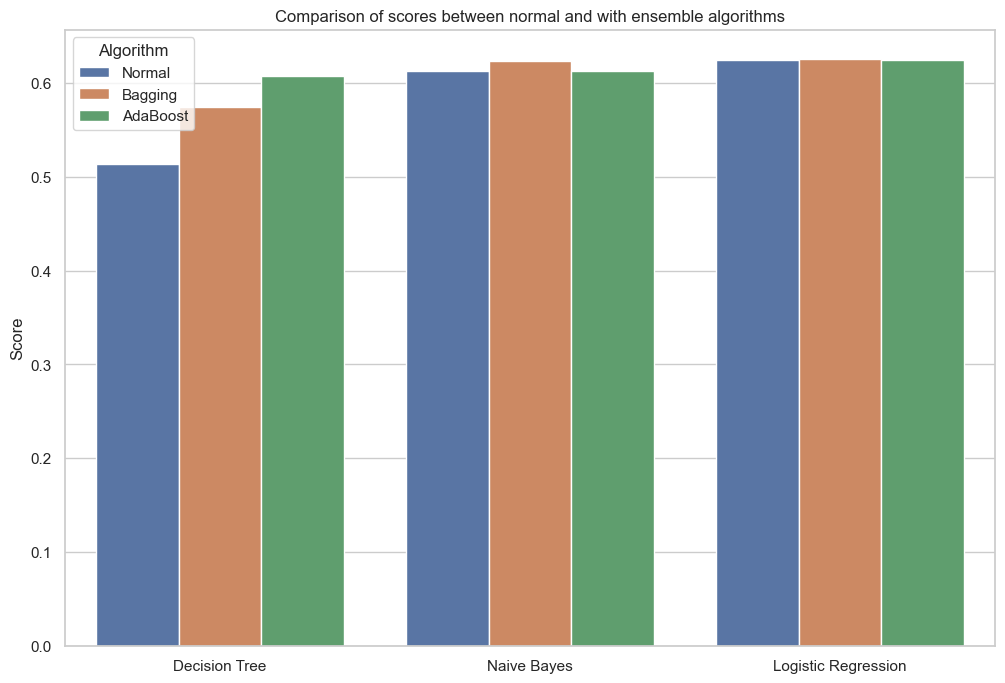

In [105]:
# data = {
#     'Algorithm': ['Decision Tree'] * 3 + ['Naive Bayes'] * 3 + ['Logistic Regression'] * 3,
#     'Score': dtc_scores_m + naive_bayes_scores_m + logistic_regression_scores_m,
#     'Type': ['Normal', 'Bagging', 'AdaBoost'] * 3
# }

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12, 8)) 
# g = sns.barplot(x='Algorithm', y='Score', hue='Type', data=pd.DataFrame(data))
# g.set_xlabel("")
# g.set_ylabel("Score")
# plt.title('Comparison of scores between normal and with ensemble algorithms')
# plt.legend(title='Algorithm')
# plt.show()

Best ones: <br> Decision Tree with Adaboost <br> Naive Bayes with Bagging <br> Logistic Regression with Bagging

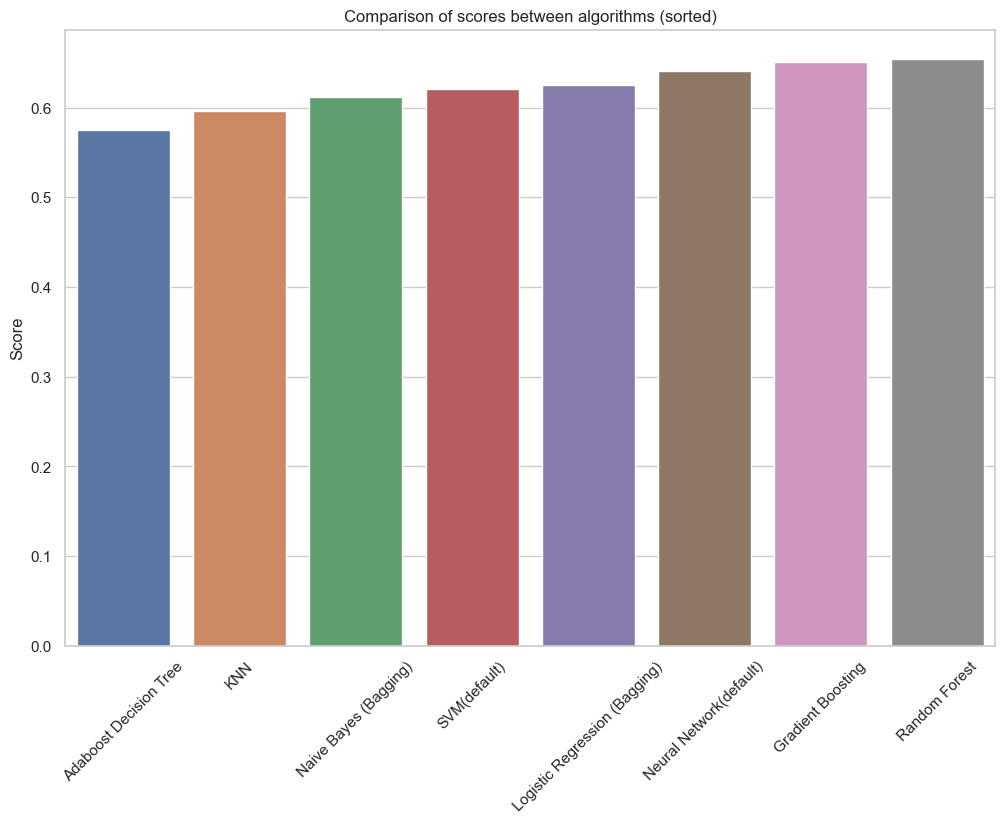

In [106]:
# data = {
#     'Algorithm': ['Adaboost Decision Tree', 'Naive Bayes (Bagging)', 'Logistic Regression (Bagging)', 'KNN', 'Random Forest', 'Gradient Boosting', 'Neural Network(default)', 'SVM(default)'],
#     'Score': [dt_bagging_score_multiclass, nb_bagging_score_multiclass, scores_log_reg_bagging_m, knn_score_multiclass, rf_score_multiclass, gbm_score_multiclass, score_nn_m, svm_score_m],
# }

# df = pd.DataFrame(data)
# df = df.sort_values(by='Score')

# sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12, 8)) 
# g = sns.barplot(x='Algorithm', y='Score', data=df)
# g.set_xlabel("")
# plt.xticks(rotation=45)
# g.set_ylabel("Score")
# plt.title('Comparison of scores between algorithms (sorted)')
# plt.show()

### 2.9 Final Model (Multiclass):

In [5]:
rf_mult = RandomForestClassifier(n_estimators=150, min_samples_split=10, min_samples_leaf=1, max_features='log2', max_depth=30, criterion='entropy', bootstrap=False, n_jobs=-1, random_state=42)

In [6]:
from sklearn.metrics import precision_score, recall_score
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
y_pred = cross_val_predict(rf_mult, train, target_multiclass, cv=cv)
precision = precision_score(target_multiclass, y_pred, average='weighted')
recall = recall_score(target_multiclass, y_pred, average='weighted')
conf_matrix_m = confusion_matrix(target_multiclass, y_pred)

c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConvers

In [7]:
precision

0.6647138042133638

In [8]:
recall

0.6857126812764105

In [21]:
conf_matrix_m

array([[ 3745,  2376,  1829],
       [ 7823,  9100,  7956],
       [ 3329,  4432, 30641]], dtype=int64)